In [15]:
# ggplot
from plotnine.data import economics
from plotnine import *

# pandas
import pandas as pd

# scipy
from scipy import stats
from sklearn import preprocessing, linear_model

# os, sys
import os
import sys

In [16]:
# !!! WARNING !!!
# THIS FILE RUNS IN /src/pyfiles/ DIRECTORY
# !!! WARNING !!!
if os.getcwd().split('/')[-1] == 'pyfiles':
    os.chdir('../..')
print("Current working directory is: ", os.getcwd())

Current working directory is:  /Volumes/cs-projects/sosc-demographics-ii


In [17]:
# load country names
country_names = pd.read_csv(os.path.join(os.getcwd(), 'src', 'metadata', 'country_codes.csv'))

# filter out countries that do not have 'use' flag set
country_names = country_names[country_names['use'] == 1]

# drop unnecessary columns
country_names.drop(['use', 'canonical', 'full'], axis=1, inplace=True)

# check data
country_names.head()

,iso,english,category
0,RUS,Russia,mainland
3,KAZ,Kazakhstan,siberia
5,POL,Poland,warsaw
6,DEU,Germany,extended
7,LVA,Latvia,eastern


In [18]:
# Define Enum
from enum import Enum
Country = Enum('Country', country_names['iso'].tolist())
print([country.name for country in Country])

['RUS', 'KAZ', 'POL', 'DEU', 'LVA', 'UKR']


In [19]:
def plot(df):
    # filter by year
    df = df[df['YEAR'] < 2002]
    df = df[df['YEAR'] > 1985]
    # normalize EACH country
    for country in country_names['english'].tolist():
        if country not in df['COUNTRY'].tolist():
            continue
        df.loc[df['COUNTRY'] == country, 'VALUE'] = preprocessing.scale(df[df['COUNTRY'] == country]['VALUE'], axis=0, with_mean=True, with_std=True, copy=True)


    # plot
    (
        ggplot(df, aes(x='YEAR', y='VALUE', color='COUNTRY')) +
        geom_line() +
        ggtitle('Normalized mortality rate by country') +
        xlab('Year') +
        ylab('Normalized mortality rate') + 
        geom_vline(xintercept=1991, linetype="dashed", color="red") +
        geom_vline(xintercept=1994, linetype="dashed", color="red") +
        facet_wrap('COUNTRY')
    )

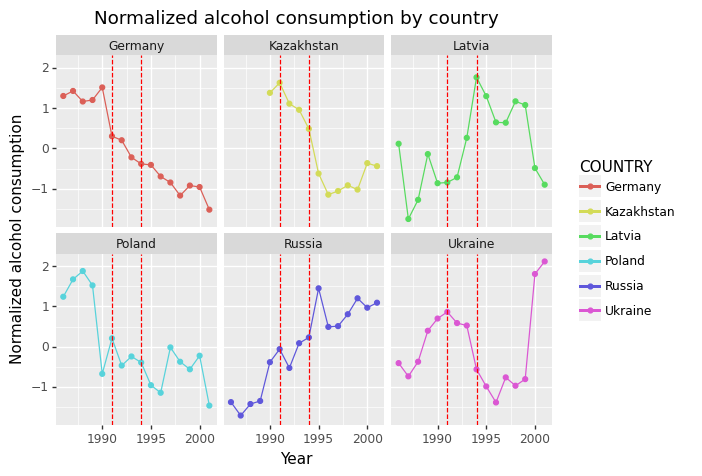

<ggplot: (378816353)>

In [20]:
## Load a dataset
from io import StringIO

metadata = dict()
df = None
with open(os.path.join('src', 'common', 'who-fha-db-pure_alcohol_consumption_1960_2015.csv'), 'r') as f:
    ## Seek the end of the header
    reader = f.readlines()
    rest = None
    for line in reader:
        if line.startswith('"COUNTRY"'):
            rest = reader[reader.index(line):]
            break
        elif len(line) < 2:
            continue
        else:
            key, value = [line.split(',')[0], "".join(line.split(',')[1:])]
            # remove quotes
            value = value.replace('"', '')
            # remove new line
            value = value.replace('\n', '')
            # remove trailing spaces
            value = value.strip()
            # remove unicoode special characters
            value = value.replace('\xa0', '')
            value = value.replace('\ufeff', '')
            metadata.update({
                key: value
            })
    ## Read the data
    df = pd.read_csv(StringIO("".join(rest)), sep=",")

# drop unnecessary columns
df.drop(['COUNTRY_GRP'], axis=1, inplace=True)
# filter out countries that do not have 'use' flag set
df = df[df['COUNTRY'].isin(country_names['iso'].tolist())]
# rename country to full name
df['COUNTRY'] = df['COUNTRY'].apply(lambda x: country_names[country_names['iso'] == x]['english'].values[0])

# normalize data
df['VALUE'] = df['VALUE'] / df['VALUE'].mean()

# filter by year
df = df[df['YEAR'] < 2002]
df = df[df['YEAR'] > 1985]


# normalize EACH country
for country in country_names['english'].tolist():
    if country not in df['COUNTRY'].tolist():
        continue
    df.loc[df['COUNTRY'] == country, 'VALUE'] = preprocessing.scale(df[df['COUNTRY'] == country]['VALUE'], axis=0, with_mean=True, with_std=True, copy=True)

# plot
(
    ggplot(df, aes(x='YEAR', y='VALUE', color='COUNTRY')) +
    geom_line() +
    geom_point() +
    theme_grey() +
    ggtitle('Normalized alcohol consumption by country') + 
    xlab('Year') +
    ylab('Normalized alcohol consumption') +
    facet_wrap('COUNTRY') +
    geom_vline(xintercept=1991, linetype="dashed", color="red") +
    geom_vline(xintercept=1994, linetype="dashed", color="red") 
)

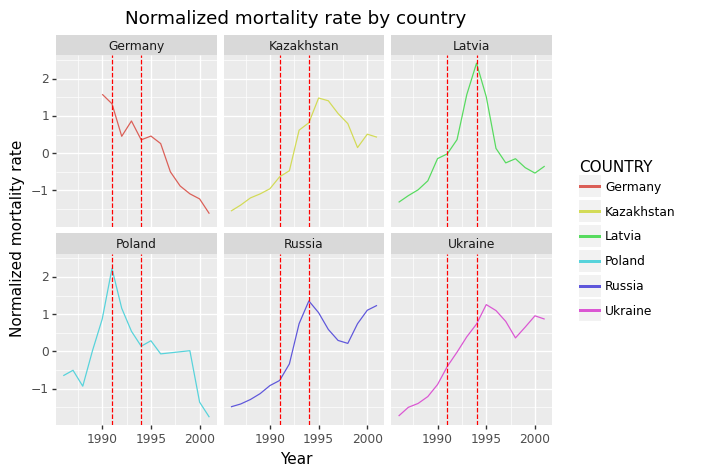

<ggplot: (378574325)>

In [21]:
## Load a dataset
from io import StringIO

metadata = dict()
df = None
with open(os.path.join('src', 'common', 'euro-mortality-db-mortality_1968-2018.csv'), 'r') as f:
    ## Seek the end of the header
    reader = f.readlines()
    rest = None
    for line in reader:
        if line.startswith('"COUNTRY"'):
            rest = reader[reader.index(line):]
            break
        elif len(line) < 2:
            continue
        else:
            key, value = [line.split(',')[0], "".join(line.split(',')[1:])]
            # remove quotes
            value = value.replace('"', '')
            # remove new line
            value = value.replace('\n', '')
            # remove trailing spaces
            value = value.strip()
            # remove unicoode special characters
            value = value.replace('\xa0', '')
            value = value.replace('\ufeff', '')
            metadata.update({
                key: value
            })
    ## Read the data
    df = pd.read_csv(StringIO("".join(rest)), sep=",")

# drop unnecessary columns
df.drop(['COUNTRY_GRP'], axis=1, inplace=True)
# filter out countries that do not have 'use' flag set
df = df[df['COUNTRY'].isin(country_names['iso'].tolist())]
# rename country to full name
df['COUNTRY'] = df['COUNTRY'].apply(lambda x: country_names[country_names['iso'] == x]['english'].values[0])

# filter by year
df = df[df['YEAR'] < 2002]
df = df[df['YEAR'] > 1985]
df = df[df['SEX'] == "MALE"]
# normalize EACH country
for country in country_names['english'].tolist():
    if country not in df['COUNTRY'].tolist():
        continue
    df.loc[df['COUNTRY'] == country, 'VALUE'] = preprocessing.scale(df[df['COUNTRY'] == country]['VALUE'], axis=0, with_mean=True, with_std=True, copy=True)


# plot
(
    ggplot(df, aes(x='YEAR', y='VALUE', color='COUNTRY')) +
    geom_line() +
    ggtitle('Normalized mortality rate by country') +
    xlab('Year') +
    ylab('Normalized mortality rate') + 
    geom_vline(xintercept=1991, linetype="dashed", color="red") +
    geom_vline(xintercept=1994, linetype="dashed", color="red") +
    facet_wrap('COUNTRY')
)


/var/folders/zz/j6r_jn5d1n33632p2lfxbbgw0000gn/T/ipykernel_65877/3846687327.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


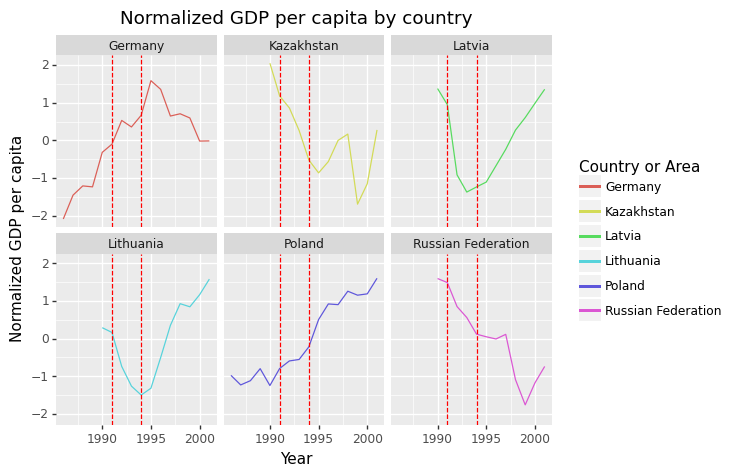

<ggplot: (378905581)>

In [26]:
# !!! WARNING !!!
# Country = None must be set or else the following code will not work
Country = None
# !!! WARNING !!!


df = pd.read_csv(os.path.join('src', 'common', 'UNdata_GDP_per_capita.csv'))
# group by country
df = df.groupby(['Country or Area', 'Year']).mean().reset_index()
df = df[df['Year'] < 2002]
df = df[df['Year'] > 1985]
# normalize EACH country
for country in df['Country or Area'].tolist():
    df.loc[df['Country or Area'] == country, 'Value'] = preprocessing.scale(df[df['Country or Area'] == country]['Value'], axis=0, with_mean=True, with_std=True, copy=True)

df.head()
(
    ggplot(df, aes(x='Year', y='Value', color='Country or Area')) +
    geom_line() +
    ggtitle('Normalized GDP per capita by country') +
    xlab('Year') +
    ylab('Normalized GDP per capita') +
    geom_vline(xintercept=1991, linetype="dashed", color="red") +
    geom_vline(xintercept=1994, linetype="dashed", color="red") +
    facet_wrap('Country or Area')
)